In [1]:
import tensorflow as tf
from learner import A3C
from environment import market
import matplotlib.pyplot as plt
%matplotlib inline

/home/kwellyt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
params = {'years': ['2018'],
          'lr': 0.01,
          'startE': 0.9,
          'endE': 0.1,
          'total_episodes': 25,
          'discount': 0.999,
          'features': ['sma'],
          'is_training': False}

In [3]:
model_path = './model/%s' % ('_'.join(params['features']))

tf.reset_default_graph()
with tf.device("/cpu:0"):
    worker = A3C(params, 'global', mode='test')
    saver = tf.train.Saver(max_to_keep=5)

In [7]:
sess = tf.Session()
ckpt = tf.train.get_checkpoint_state(model_path)
saver.restore(sess, ckpt.model_checkpoint_path)
envs = market(features=params['features'], years=params['years'], mode='test')
d, s = envs.reset()

INFO:tensorflow:Restoring parameters from ./model/sma/model-25(sma).cptk


In [20]:
d, s = envs.sess.run(envs.next_sma_element)

ValueError: not enough values to unpack (expected 2, got 1)

In [8]:
chart = s['sma']

In [9]:
chart1, chart2, chart3, chart4 = sess.run([worker.agent.layer1, worker.agent.layer2, worker.agent.layer3, worker.agent.layer4], feed_dict={worker.agent.sma: chart})

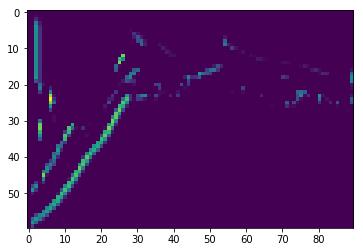

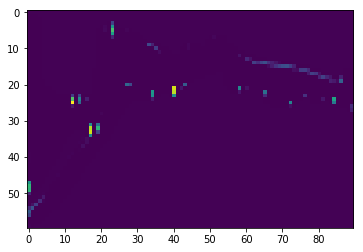

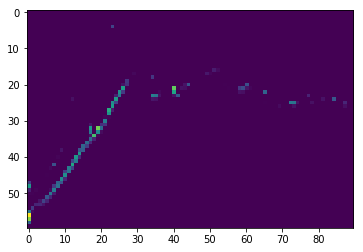

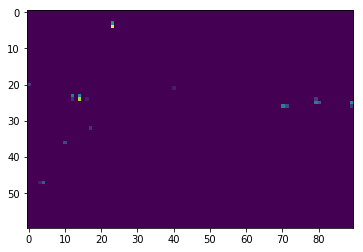

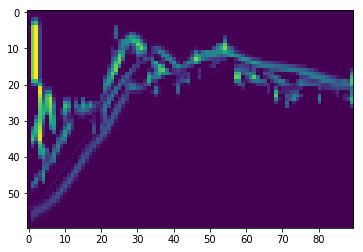

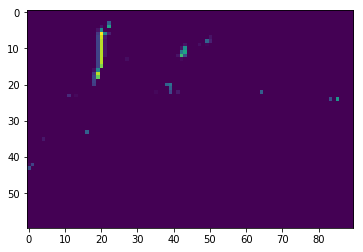

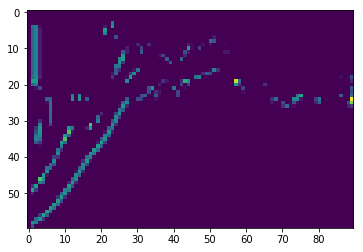

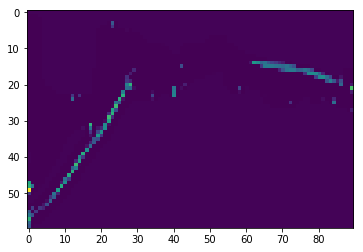

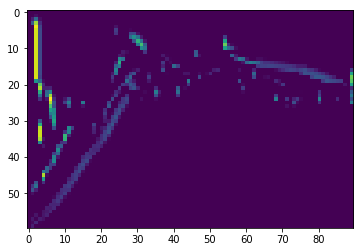

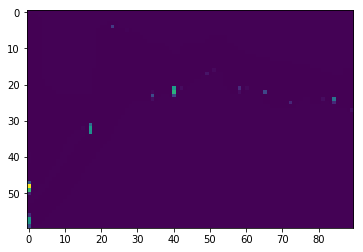

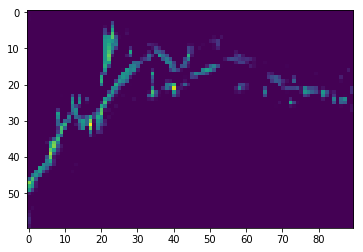

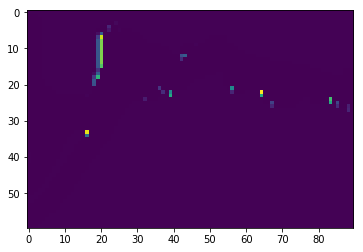

In [15]:
for i in range(12):
    plt.figure()
    plt.imshow(chart1[0, :, :, i])

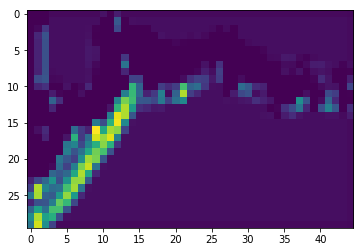

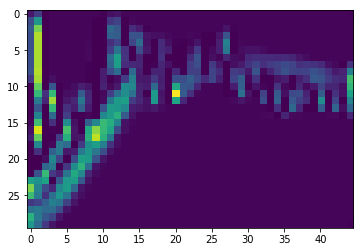

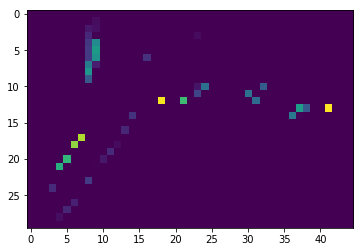

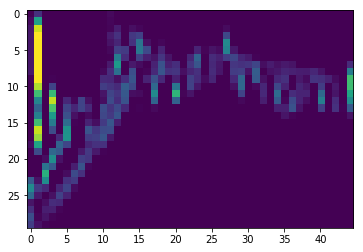

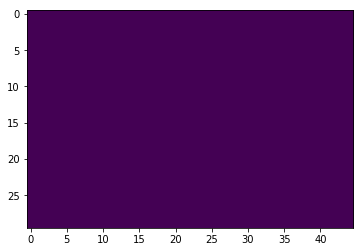

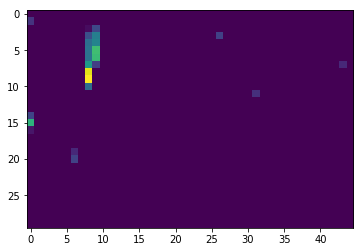

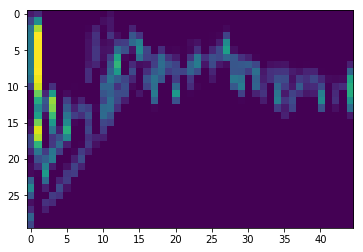

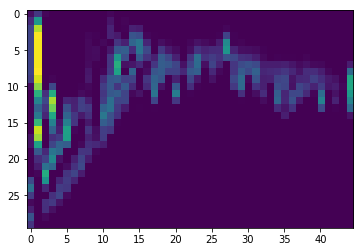

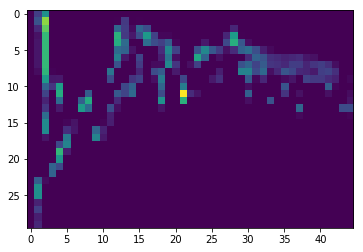

In [16]:
for i in range(9):
    plt.figure()
    plt.imshow(chart2[0, :, :, i])

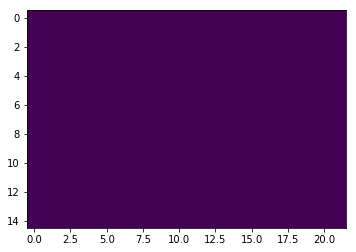

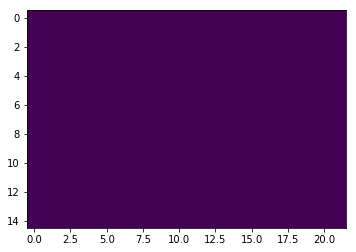

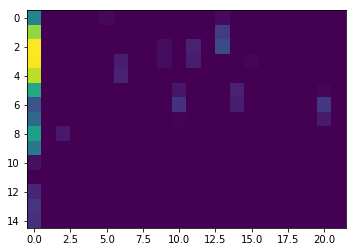

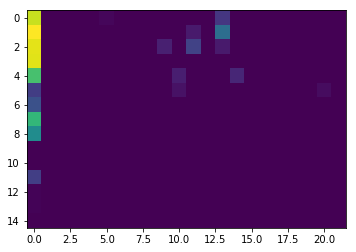

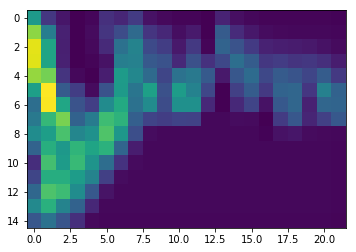

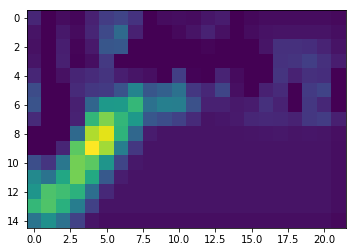

In [17]:
for i in range(6):
    plt.figure()
    plt.imshow(chart3[0, :, :, i])

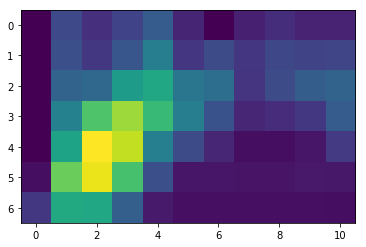

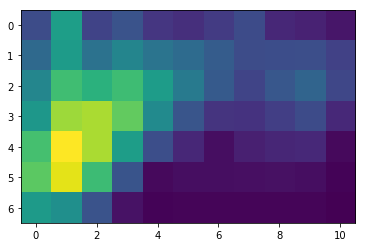

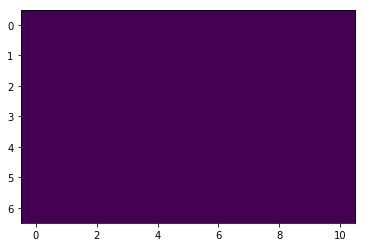

In [18]:
for i in range(3):
    plt.figure()
    plt.imshow(chart4[0, :, :, i])